# The Safest Neighborhood

### Introduction: 

The best neighborhood is one in which a resident can feel safe and free from harm. Other amenities such as parks and good education systems are nice, but they are not very useful if the people are not alive to use them. There are many types of harm, but the three we will focus on are fires, crime, and step-related accidents. The motivation behinnd picking safety as our metric to analyze the neighborhoods is that it is a unique way to view the problem of the best neighborhood in Pittsbrgh that may present some unique results compared to the traditional metrics. We explored other metrics like income, environmental factors, and education level, but they seemed a little drab despite their usefullness, so we decided rather to go with more of a theme. Further, safety impacts the personal well-being of the people living in a neighborhood, thus being an essential factor when evaluating neigborhoods due to the positve health impacts it can have. 

### Metric:
Our metric is the safety of a given neighborhood relative to the other neighborhoods in the city. We will be measuring this by finding the amount of fires adjusted for population, the crime rate adjusted for population, and the amount of stairs in a given neighborhood. At the end of the analysis, this will all be combined into a single metric that can be used to rank each neighborhood in Pittsburgh. In the analysis, each metirc will be giving wheighting, with steps and fires having equal wheighting while crime has double the wheighting. The reasoning behind this metric is that the best neighborhood to live in is the neighborhood where you are able to live the longest, making safety the most important factor in determing the best neighborhood.

### Datasets:

* Fire Incidents in Pittsbrugh: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh
    * This dataset records all fire incidents in the city of Pittsburgh since 2013, recording different aspects of the fires, most importantly, the neighborhoods in which they occurred.
* Recorded Crimes in Pittburgh: https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e
    * This dataset records all incidents of crime in the city of Pittsburgh since 2005. In each entry (over 225,000) a neighood is recorded, allowing the data to be analyzed on a neighborhod basis.
* Population per Neighborhood:  https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv
    * This dataset is simply the total populations of each neighborhhod through census data, allwwoing data like crime and fires to be analyzed while adjusted for population.
* Neighborhood Map Data of Pittsburgh: http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip
    * This is the map data for the city of Pittsburgh, allowing us to analayze metrics geographically through GeoPandas.
* City of Pittsburgh Steps: https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64
    * This is the amount of steps in each neighborhood of Pittsburgh, if a neighborhood did not reprt their steps, they were not included in the final rankings. The reasoning behind this is that if a neighborhood does not take care in reporting their steps, they should not be considered to be the best neighborhood.

---

# Fires
Fires play a large role in the number of accidents in any given city and are a crucial metric in deciding the accident safety of any neighborhood. Disparities in prevalence between neighborhoods can come down to problems complex as a faulty fire department or simple as the material the homes were built of. There are 1,318,500 fires in the U.S. a year, causing over 3,500 deaths and $25.6 billion in losses, thus making it an essential statistic (https://www.usfa.fema.gov/data/statistics/). We are measuring this metric based on the number of fires in a neighborhood, with a lower number of fires being better. The dataset being used is a record of all fire incidents in the city of Pittsburgh since 2013. The analyis will analyze this data, adjusting for population. Specifically, we will analyze by neighborhood using both a bar graph and a heat map of Pittsburgh.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline
import geopandas as gpd

In [3]:
fire_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02",
                       index_col="call_no", parse_dates=True)
total_pop = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv",
                       index_col = "Id")
fire_inc.sample(5) #Gives a sample of the dataset

,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
call_no,,,,,,,,,,,,,,,,,
F160095095,131.0,Passenger vehicle fire,"PERRYSVILLE AVE & RICHEY AV, PITTSBURGH PA 15214",2016-11-28T16:14:02,1,231EN34,2607.0,Perry North,1.0,26.0,4.200326e+10,1.0,26.0,1.0,1-15,40.486781,-80.016232
F140059096,151.0,"Outside rubbish, trash or waste fire","6000 BLOCK PENN AVE, PITTSBURGH PA 15206",2014-08-18T04:45:30,0,231EN08,1115.0,East Liberty,9.0,8.0,4.200311e+10,2.0,8.0,5.0,3-8,40.461077,-79.924577
F160086406,113.0,"Cooking fire, confined to container","8500 BLOCK DERSAM ST, PITTSBURGH PA 15208",2016-10-29T12:23:06,1,231EN17,1306.0,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.459207,-79.875934
F130067065,123.0,"Fire in portable building, fixed location","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",2013-09-15T20:26:42,0,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
F170094462,111.0,Building fire,"1000 BLOCK LAWNDALE ST, PITTSBURGH PA 15221",2017-11-16T06:02:17,1,231EN17,1301.0,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.455851,-79.881624


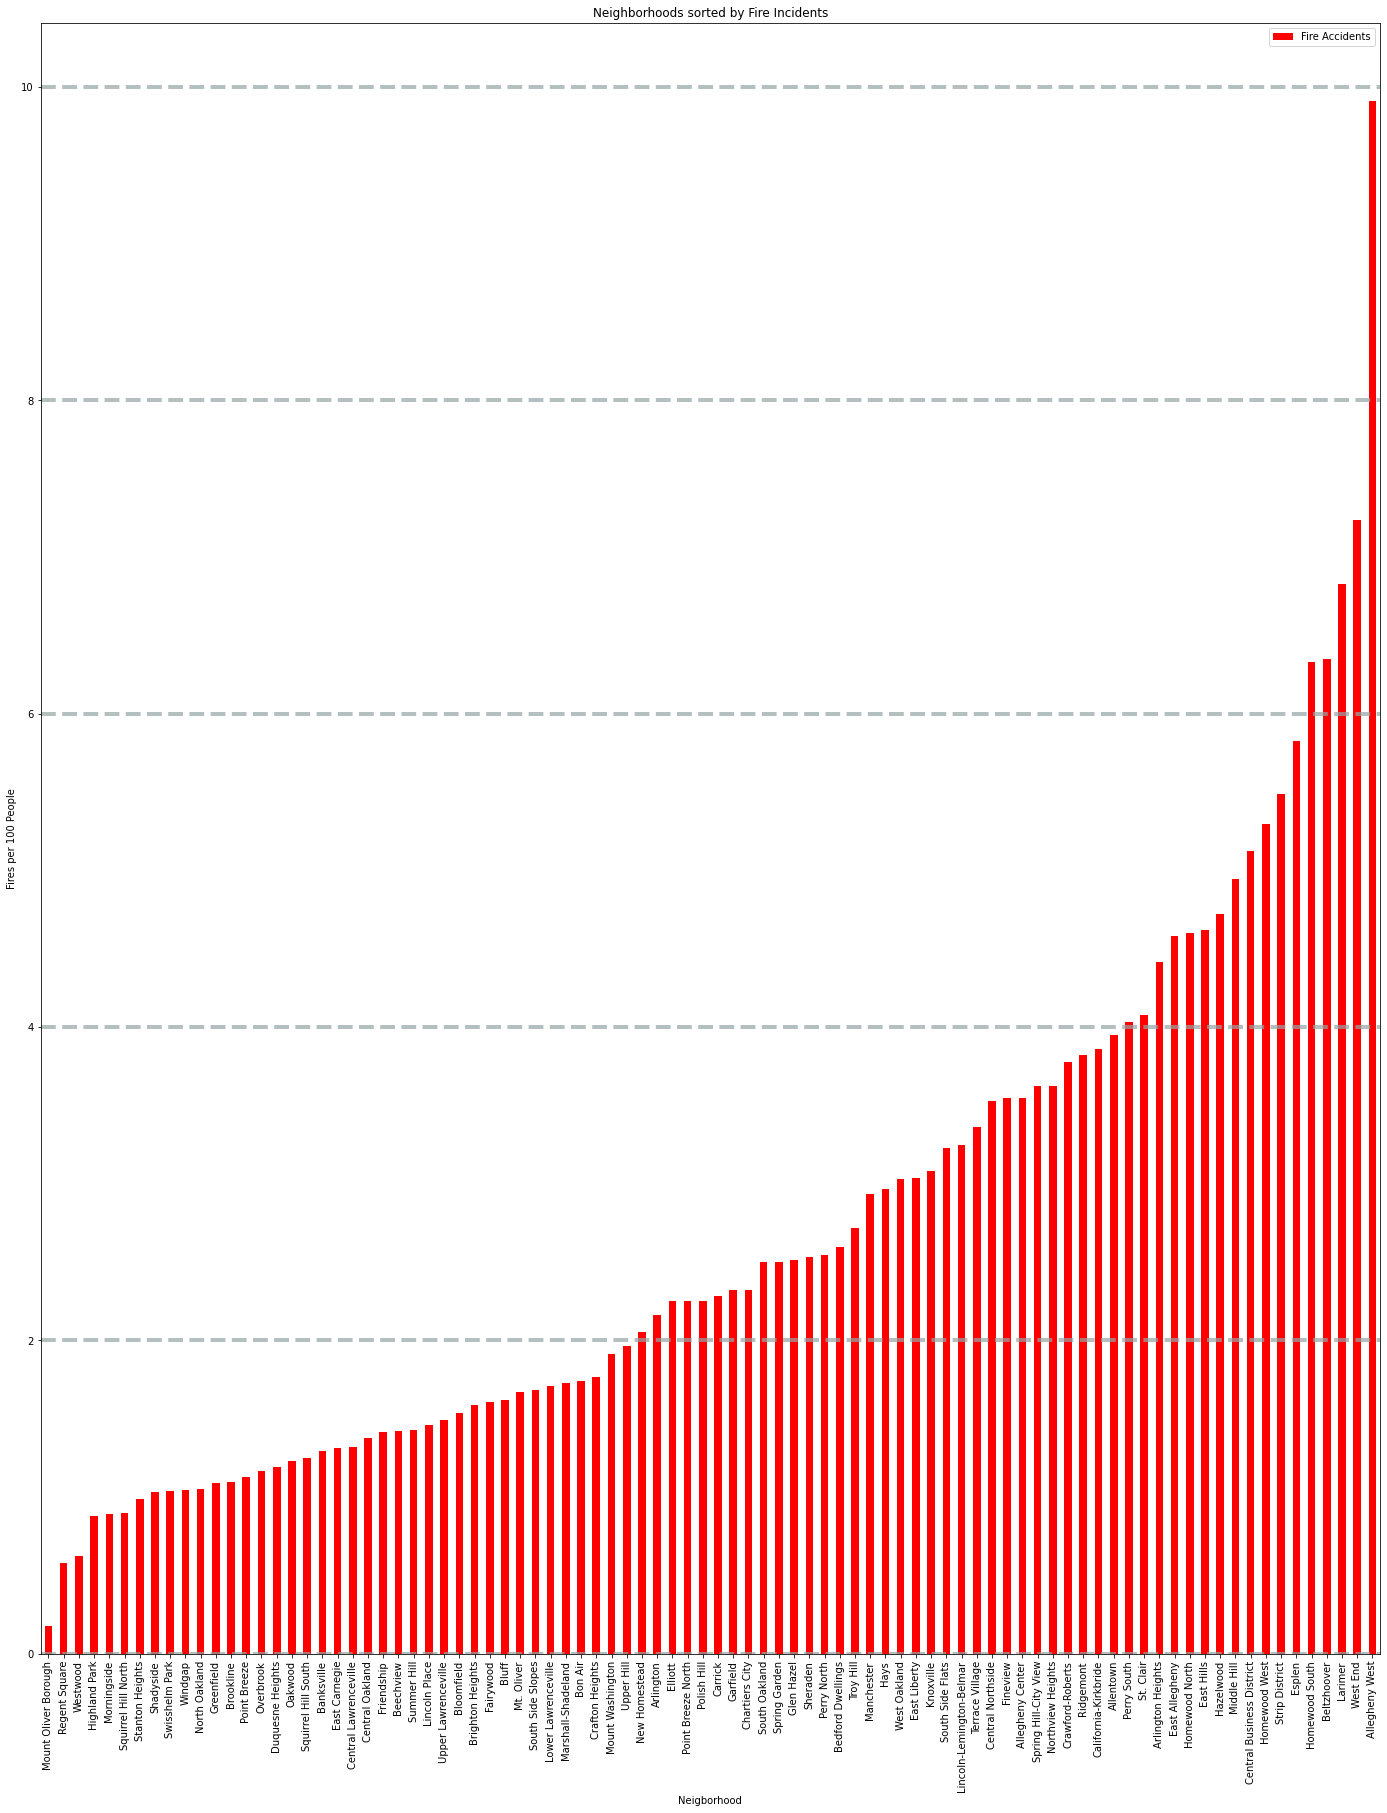

In [15]:
fires = dict() #Dictionary for the fire incidents
pops = dict()  #Dictionary for the population

for i in range(len(fire_inc)):
    if(fire_inc.iloc[i,7] in fires): #Counts the number of fire incidents for each neighborhood
        fires[fire_inc.iloc[i,7]] += 1
    else:
        fires[fire_inc.iloc[i,7]] = 1       


for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in fires): #Performs the population adjustment and year averaging if the neighborhood is in the dictionary
            fires[total_pop.iloc[i,0]] = ((float)(fires.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)
            
sorted_fires = sorted(fires.items(), key=lambda x:x[1]) #Sorts the dictionary
#Does not return a dictionary, rather a list of tuples

keys = []
values = []

for v in sorted_fires: #Appends the keys and values of the fire dictionary into lists
    keys.append(v[0])
    values.append(v[1])

for i in range(4): #Removes the outlier data from the dictionary
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

df = pd.DataFrame(values, columns = ['Fire Accidents'], index= keys) #Processes the kists as a dataframe

#This block of code simply graphs the data as a bar graph
df.plot(kind='bar', color = 'red')
plt.title("Neighborhoods sorted by Fire Incidents")
plt.xlabel("Neigborhood")
plt.ylabel("Fires per 100 People") 
plt.rcParams["figure.figsize"] = (28,12)  #Figure size is adjusted so that the names are readable
plt.grid(color='#95a5a6', linestyle='--', linewidth=4, axis='y', alpha=0.7)  #Lines are added to make the graph more readable
plt.show()

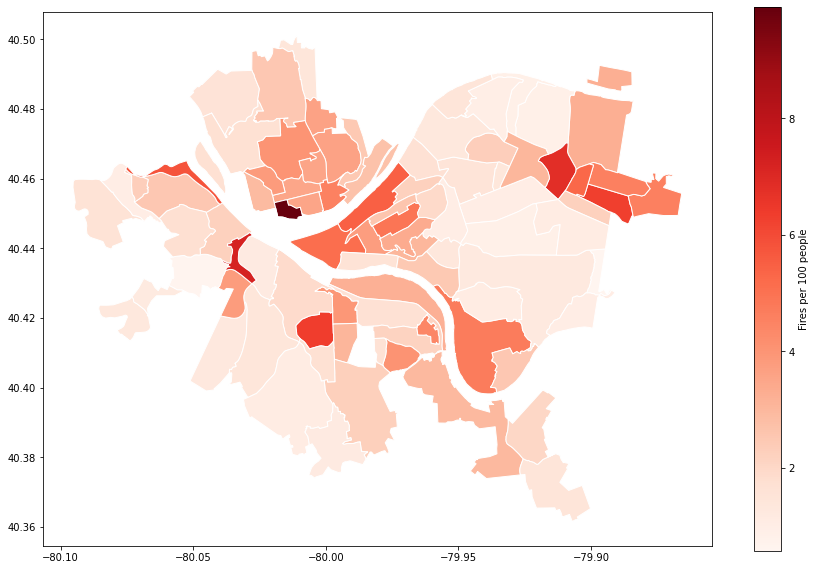

In [5]:
pitt = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")
fire_df = {'hood':keys, 'fires':values} #Makes a new data frame out of the data so that it can merged into the original dataset
fire_df = pd.DataFrame.from_dict(fire_df)
merge_fire = pitt.set_index('hood').join(fire_df.set_index('hood')) #Joins the dataseets together based on the neghborhood names
#Creates a heatmap of the data based on the color red
merge_fire.plot(column='fires', 
               cmap='Reds',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Fires per 100 people"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

## Analysis
The data produces some expected rusults such as Highland Park, Swissvale, and Squirrel Hill all having low fire rates, but there were suprises as well, with Mount Oliver Borough being the best rated neighborhood based on fire incidents per population. The geographic results are also unsuprising with the center of the city having a higher fire rate due to the dense population and amount of businesses in the area. Consequently, it is generally best to live in the more residentially designated areas in the limits of Pittsburgh if you wish to avoid fire accidents. Further the worst neighborhood to live in was by far, Allegheny West with nearly 1.4 fires per 100 people in a given year. Also, based on fire, business districts such as the Strip District are not highly rated probably because of businesses like restaurants producing fires with a low amount of people actually living there.

---
# Crime
Just as fires are an essential piece of neighborhood safety, crime is even more so, with homicides accounting for 18,000 deaths a year (https://www.cdc.gov/nchs/fastats/homicide.htm). Further, crime is an important mettric because it often is an indicator of other aspects of the quality of neighborhood, whether it be funding, average income, and even average education levels. Through our dataset, we will be measuring crime safety based on the number of crimes in a given neighborhood, with a lower number being better. The dataset being used is a record of all crime occurances in the city of Pittsburgh since 2005. The analyis will analyze this data, adjusting for population and getting a yearly average, by neighborhood using both a bar graph and a heat map of Pittsburgh.

In [6]:
crime_inc = pd.read_csv("https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e", index_col="PK")
crime_inc.sample(5)

,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
PK,,,,,,,,,,,,,,
3115504,19218846.0,10,2019-10-26T23:50:00,"1500 Block E Carson ST Pittsburgh, PA 15203",Y,South Side Flats,3,SIMPLE ASSAULT/INJURY,5505 Public Drunkenness / 2701(a)(1) Simple As...,1702.0,3.0,3.0,-79.983310,40.428693
3011453,18133238.0,7,2018-07-13T16:55:00,"200 Block Elmore ST Pittsburgh, PA 15219",N,Middle Hill,2,MTR VEH THEFT (AUTO),2701 Simple Assault. / 3921(a) Theft by Unlawf...,501.0,6.0,3.0,-79.975412,40.441835
2810190,16026864.0,24,2016-02-13T15:00:00,"700 Block Brookline BL Pittsburgh, PA 15226",N,Brookline,6,HARRASSMENT BY COMUN/ADDRESS,2709(a)(4) Harassment Communicates Prohibited ...,1919.0,4.0,4.0,-80.021692,40.394583
2815565,16040834.0,14,2016-03-04T15:10:00,"5800 Block Northumberland ST Pittsburgh, PA 15217",N,Squirrel Hill North,4,CRIMINAL MISCHIEF (AUTO),3304 Criminal Mischief.,1403.0,8.0,3.0,-79.923288,40.441372
2811815,16030893.0,6,2016-02-20T00:33:00,"200 Block Atwood ST Pittsburgh, PA 15213",N,Central Oakland,4,RETAIL THEFT (SHOPLIFTING),3929 Retail Theft.,405.0,3.0,3.0,-79.956889,40.440420


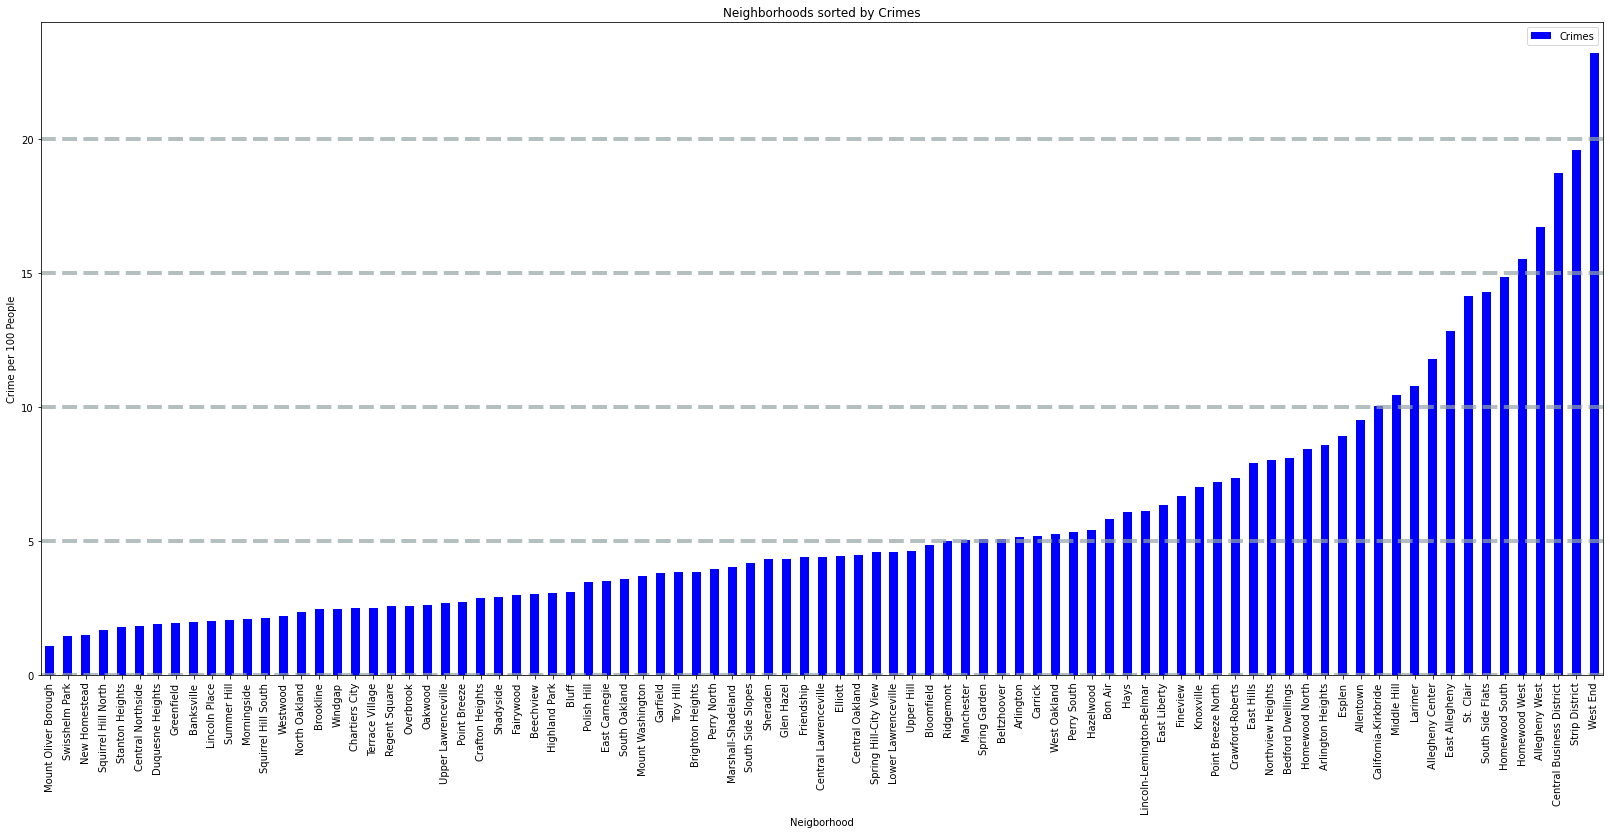

In [7]:
crime = dict() #Dictionary for crime data

for i in range(len(crime_inc)): #Creates a dictioary of how many crime incidents there are in a neighborhood
    if(crime_inc.iloc[i,5] in crime):
        crime[crime_inc.iloc[i,5]] += 1
    else:
        crime[crime_inc.iloc[i,5]] = 1    
 
crime["Mount Oliver Borough"] = (363 + 117 + 70) #This had to be manually coded in because it had three different names in the dataset         
 
for i in range(len(total_pop)):
       if(total_pop.iloc[i,0] in crime): #Adjusts for population and year
            crime[total_pop.iloc[i,0]] = ((float)(crime.get(total_pop.iloc[i,0]) / total_pop.iloc[i,1]) * 100)/15
            

sorted_crime = sorted(crime.items(), key=lambda x:x[1]) #Sorts the dictionary

keys = []
values = []
for v in sorted_crime: #Makes a list of the neighborhood names and crime occurances so that they can be made into a dataframe
    keys.append(v[0])
    values.append(v[1])

#This dataset was faulty and had less consistent data    
for i in range(13): #Removes the outliers
    keys.pop(len(keys)-1)
    values.pop(len(values)-1)

#Makes a bar graph in a similar fashion to the fire graph
df = pd.DataFrame(values, columns = ['Crimes'], index= keys) 
df.plot(kind='bar', color = 'blue')
plt.title("Neighborhoods sorted by Crimes")
plt.xlabel("Neigborhood")
plt.ylabel("Crime per 100 People")
plt.rcParams["figure.figsize"] = (28,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=4, axis='y', alpha=0.7)
plt.show()

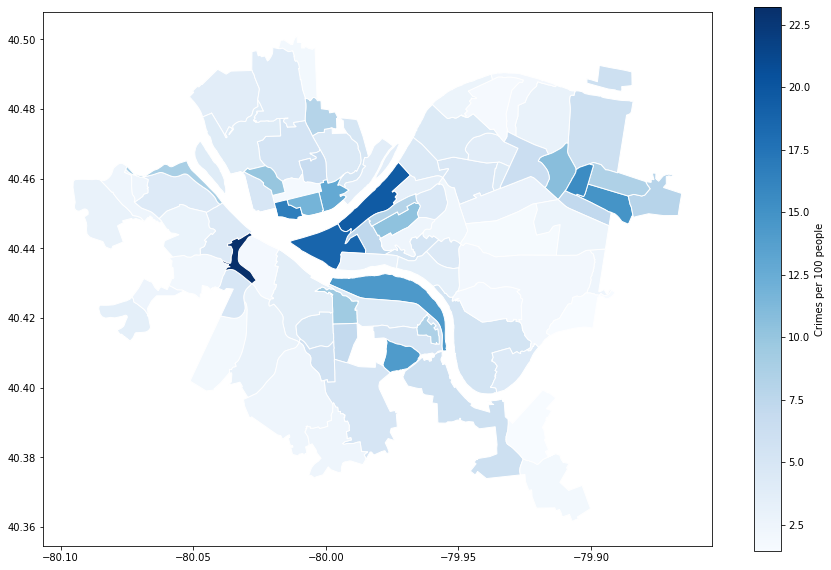

In [8]:
pitt = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")
#Creates a heat map of Pittsburgh based on crime data
crime_df = {'hood':keys, 'crime':values} #Data frame of our results of the dataset
crime_df = pd.DataFrame.from_dict(crime_df)
merge_crime = pitt.set_index('hood').join(crime_df.set_index('hood')) #Joins the origianl and new dataset
merge_crime.plot(column='crime', 
               cmap='Blues',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Crimes per 100 people"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

### Analysis
The results of the crime incidents show similar trends to that of the fire data, with many of the neighborhoods ranking high. Notably, Mount Oliver Borough, Squirrel Hill and Swissvale rank highly again, putting them in contention for the safest neighborhoods in Pittsburgh, with Mount Oliver Borough being the highest rated again. The geographic trends are dually constant as the center of the city tend to produce higher crime even when adjusted for population. Also, again, the busnisess districts in Pittsburgh like the Strip District performed poorly due to the high volume of people and busniess occurring in its confines with a low amount of people actually living there. Therefore, again, if you are picking a neighborhood solely on your safety, it is best to pick a home in the more residentially designated areas. As of now, Mount Oliver Borough has been the safest Pittsburgh area, claiming both the lowest crime and fire rate in the city.

---
# Steps
Every day, step-related injuries occur, both within homes and outside. Steps can be difficult to navigate in some circumstances, and the consequences of falling can be deadly. In the US, studies estimate over 1,000,000 injuries and 12,000 deaths are caused by steps each year (https://pubmed.ncbi.nlm.nih.gov/28947224/). Pittsburgh is a city with many steps; they were commonly used for commuting and getting around the city, but now, many have been weathered down and are unsafe. This dataset contains information about the distribution of steps across the city. Neighborhoods with more steps pose a greater risk for accidents, especially in the winter. For this dataset, the neighborhoods will be judged based on their step count (lower is better).

In [9]:
stepCSV = pd.read_csv("https://data.wprdc.org/datastore/dump/43f40ca4-2211-4a12-8b4f-4d052662bb64", index_col="id", parse_dates=True)

 
#get rid of empty data
def filterEmpty(x):
    return x.iloc[0,5] != None
stepData = stepCSV.groupby("number_of_steps").filter(filterEmpty)

stepCount = {}

#loop through data, adding step count for each entry to corresponding neighborhood
for i in range(len(stepData)):
    
    #check if key exists in dict
    if stepData.iloc[i,14] in stepCount:
        stepCount[stepData.iloc[i,14]] += stepData.iloc[i,5]
    else:
        stepCount[stepData.iloc[i,14]] = stepData.iloc[i,5]

#sorting the data
def stepSort(x):
    return x[1]

stepList = [[key, value] for key, value in stepCount.items()] #can't sort a dictionary
stepSorted = sorted(stepList, key=stepSort)

stepCSV.sample(5)

,name,maintenance_responsibility,installed,material,length,number_of_steps,schools_count,school_score,total_population,transit_rider_count,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
id,,,,,,,,,,,,,,,,,,,,,
1664714522,S 4th St from McKean St to E Carson St,4th Division,1931-01-01,Concrete,55.0,56.0,0.0,100.0,117.0,95.0,...,South Side Flats,3.0,17,42003170200,3,17,3,4-2,40.429390,-79.996286
126425621,Stratmore Ave and Crafton Blvd to Clearview Ave,5th Division,NaN,Wood,17.0,31.0,1.0,10.0,1036.0,23.0,...,Westwood,2.0,28,42003563100,5,28,6,1-18,40.437596,-80.055854
249264327,56th St from Duncan to Wickliff St,2nd Division,1946-01-01,Concrete,167.0,26.0,NaN,NaN,NaN,NaN,...,Upper Lawrenceville,7.0,10,42003101100,2,10,2,3-5,40.482625,-79.945932
602315614,Sheraden Park 1,Parks - Western,NaN,Concrete,NaN,NaN,NaN,NaN,NaN,NaN,...,Sheraden,2.0,20,42003562500,5,20,6,1-16,40.458556,-80.059290
50987987,30th St from Bigelow Blvd to Leander St,3rd Division,1948-01-01,Concrete,106.0,106.0,0.0,100.0,235.0,27.0,...,Bedford Dwellings,7.0,6,42003060500,3,6,2,2-24,40.454787,-79.968453


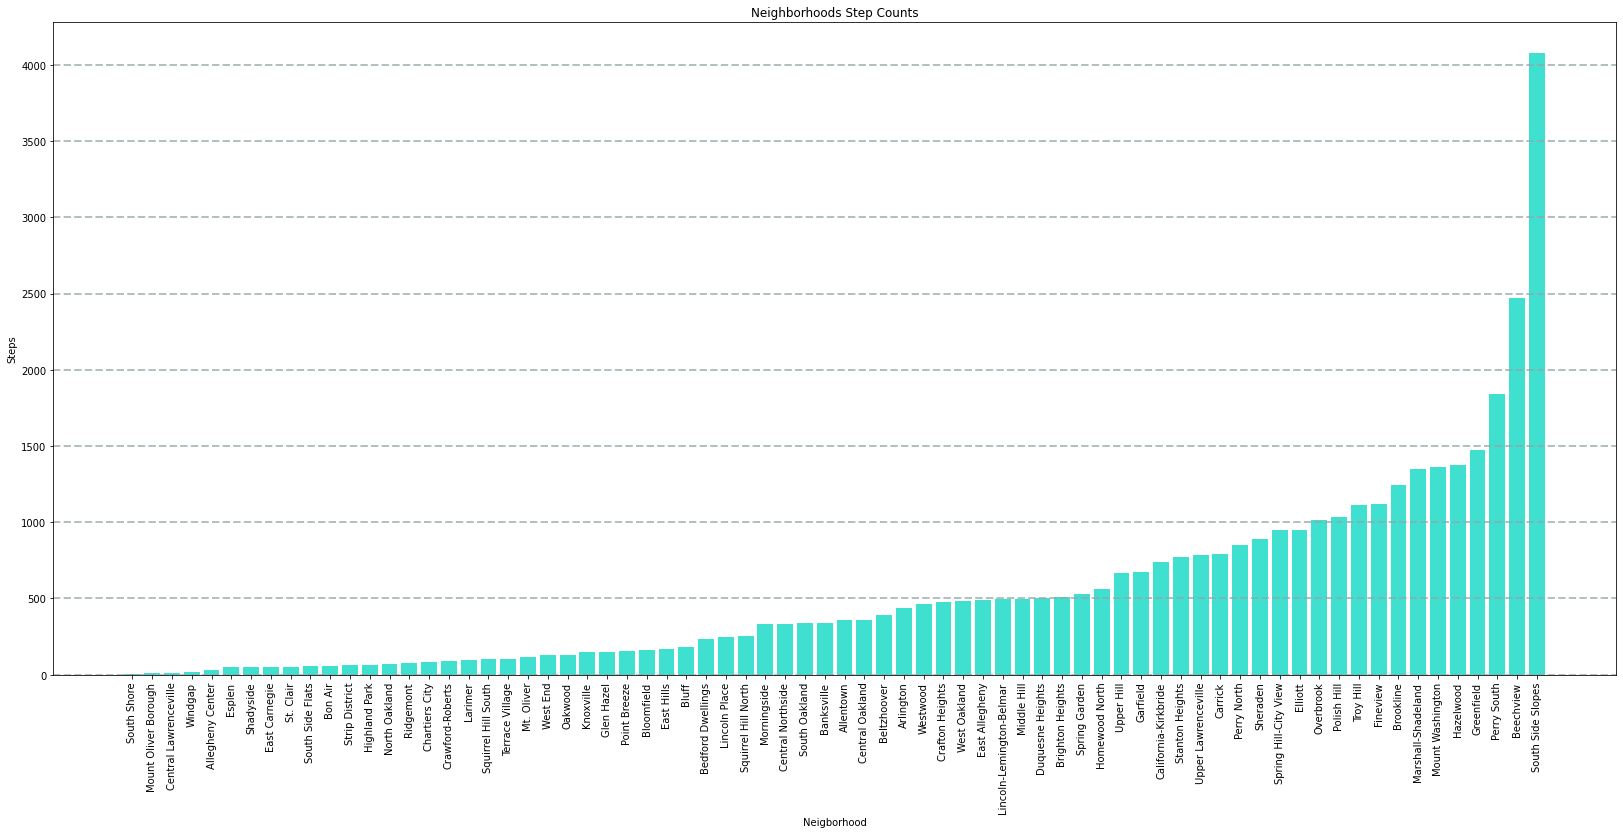

In [10]:
plt.bar(*zip(*stepSorted), color="turquoise")   #uses zip and * to pass the lists from the dict to the plot
plt.title("Neighborhoods Step Counts")
plt.xlabel("Neigborhood")
plt.ylabel("Steps")
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (24,12)
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.show()

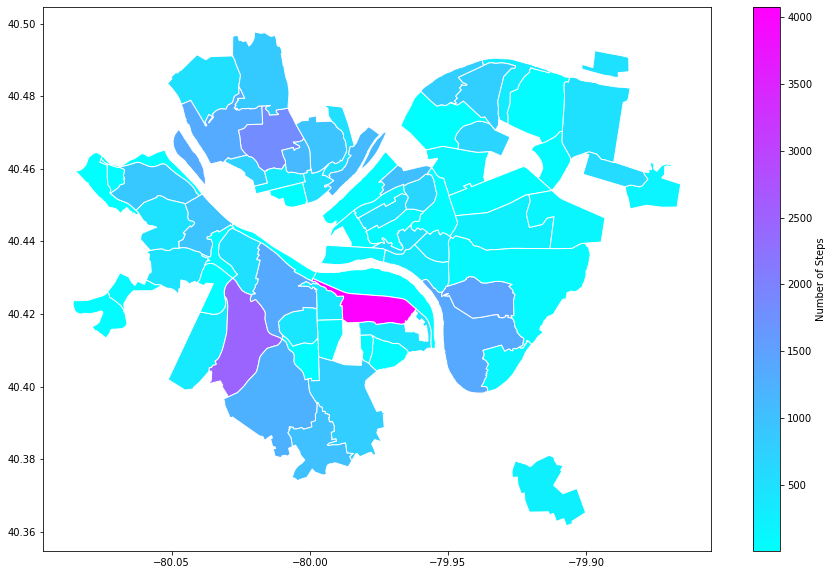

In [11]:
neighborhoods = gpd.read_file("http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip")

#convert dictionary to dataframe
stepDF = pd.DataFrame.from_dict(stepCount, orient='index', columns=['steps'])

#merge neighborhood dataset with steps
stepsMap = neighborhoods.merge(stepDF, how='right', left_on='hood', right_index=True)

stepsMap.plot(column='steps', # set the data to be used for coloring
               cmap='cool',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Steps"}, # label the legend
               figsize=(15, 10),         # set the size
               )
plt.show()

## Analysis
The step dataset differs in results from the other datasets, as geography and infrastructure are not necessarily correlated with the same factors that affect crime and fire. All of the neighborhoods have at least one set of steps, but some of them do not report how many steps they have, so those neighborhoods are not included. If a neighborhood is incapable of reporting its step totals, it likely cannot be trusted with other important matters. As expected, many of the vertical neighborhoods with names that imply a need for steps such as South Side Slopes, Mt. Washington, Troy Hill, and Polish Hill score highly on this metric. Waterfront neighborhoods tend to score low. This metric did not need to be adjusted for population because the amount of people living in an area has no effect on your personal ability to get injured on steps; you could just as easily get hurt on steps in the middle of a forest or in Manhattan.

---
# Best Neighborhood
To detemine the best neighborhood we will combine all three of our metrics into the same dataset. The fires dataset is already wheighted, having values ranging from 1-10.  Therefore, the step data was scaled so that it would roughly have the same range of values. However, we gave the crime metric twice the weighting, with values between 0-20, since we believe that it is the most important metric when viewing neighborhood safety. The combination of all three metrics is represented on a bar graph and we will draw our conclusion based on the visual representation of the metrics.

In [12]:
firstMerge = crime_df.merge(fire_df, on="hood") #Merges the two dataframes by the nieghborhoods

#scale step data down to a comparable scale to other metrics
for i in range(len(stepSorted)):
    stepSorted[i][1] /=  400 #Dividing by 400 puts the step values into a range of 1-10

scaledStepDF = pd.DataFrame(stepSorted, columns=['hood','steps'])

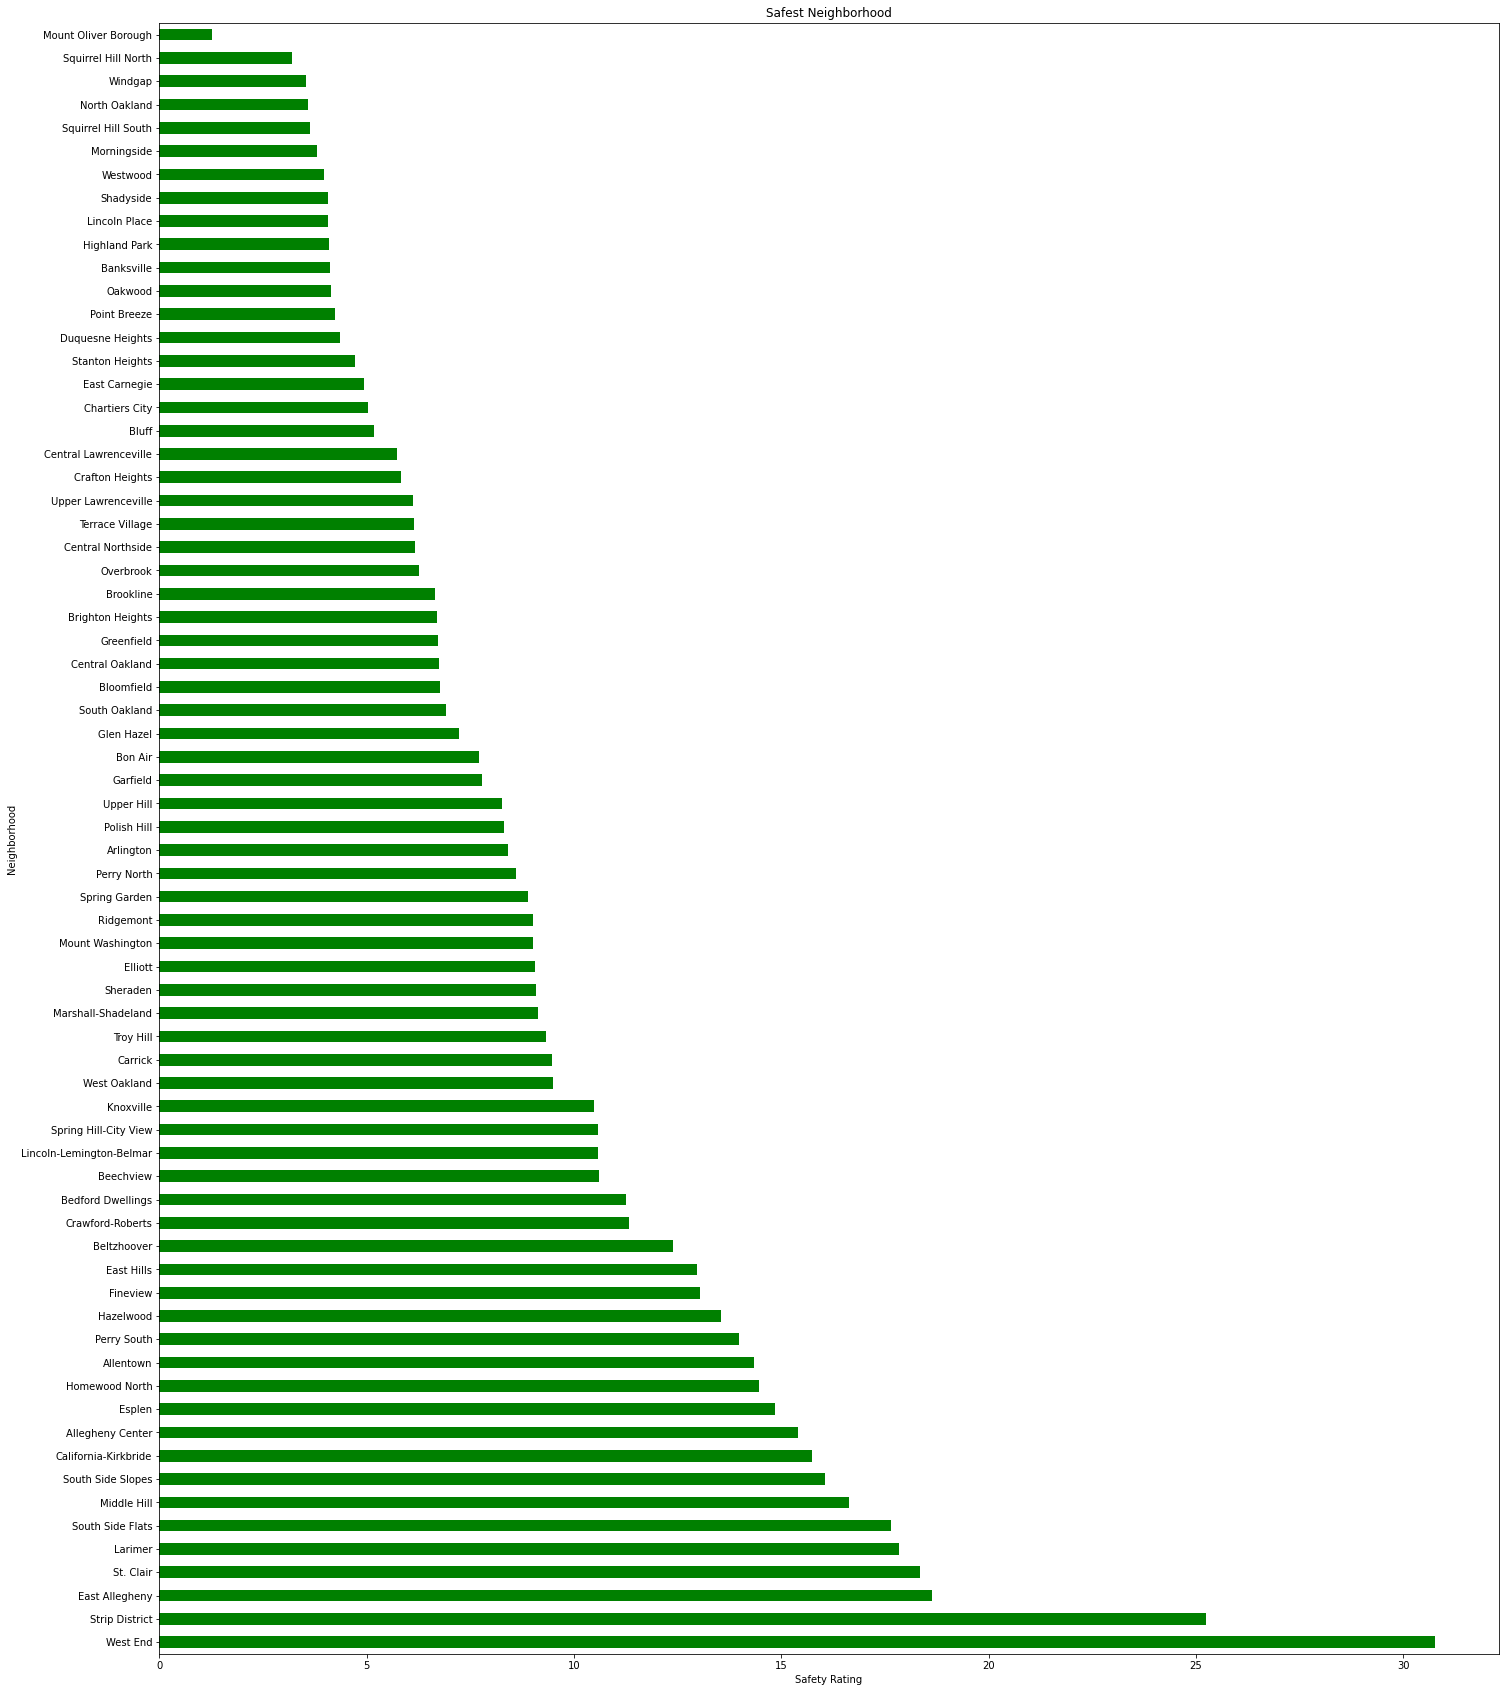

In [17]:
merged = firstMerge.merge(scaledStepDF, on="hood").set_index("hood") #merges all three dataframes
merged["total"] = merged["fires"] + merged["crime"] + merged["steps"] #creates a total column to analyze the overall metric
merged_sort = merged.sort_values('total', ascending=False) #Sorts the values in the data frame by the total column

#This block of code visualizes the data using a bar graph
merged_sort['total'].plot.barh(color = 'green', stacked=True)
plt.title("Safest Neighborhood")
plt.xlabel("Safety Rating")
plt.ylabel("Neighborhood")
plt.rcParams["figure.figsize"] = (24,30)
plt.show()

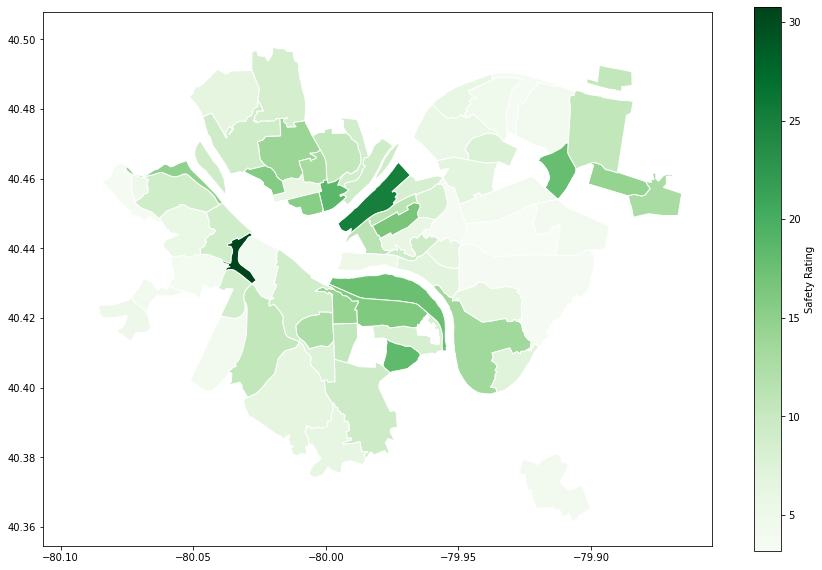

In [14]:
merge_total = pitt.set_index('hood').join(merged) #Joins the dataseets together based on the neghborhood names
#Creates a heatmap of the data based on the color red
merge_total.plot(column='total', 
               cmap='Greens',              
               edgecolor="white",       
               legend=True,             
               legend_kwds={'label': "Safety Rating"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "white"}
               )
plt.show()

## Analysis
Based on the combination of the three metrics, Mount Oliver Borough was the safest and therefore, best neighborhood in Pittsburgh. This is a little decisive because Mount Oliver Borough is not technically part of the City of Pittsburgh as it is its own city and opposed annexation by the city despite being surrounded by its neighborhoods. However it is hard not to include them based on their performance and their inclusion in many of the datasets. The results of our analysis was personally suprising to me because my intepretation of Mount Oliver Borough is not that of a safe neighborhood. However, the other high-ranking neighborhoods like Squirrel Hill were entirely expected. This could have been result of faults in the datasets since Mount Oliver Borough is not technically under the jurisdiction of Pittsburgh, maintaing itself as its own ciy. Therefore, since it is independednt, they may handle much of their crime and fire incidents internally and that would not be reported in the WRPDC datasets. If you do not consider it part of Pittsburgh, Squirrel Hill North is the safest neighborhood. Further, by merging with the steps dataset, it put many neighborhhods out of contention because they did not report any data and we bellieve that if a neighborhood does not report their dangerous steps, they should not be considered for the title of the best neighborhood. Also, the geographic trends of safety are consistent with the crime and fire metrics, but resendential areas have now been considered less safe with the inclusion of steps.

### Winner: Squirrel Hill North

---
### James Duty's Conclusion:
The data-driven determination of the best neighborhood is much different than my personal favorite neighborhood in Pittsburgh, which is the Strip District. Further, I do not think that the best neighborhood to live in should be your favorite neighborhood. I believe the best neighborhood to live in is the neighborhood that where you feel the safest and where you can unwind. Thus, based on that beleif, we developed the metric used in this project to find the best neighborhood.

However, that should not be your favorite neighborhood, with your favorite neighborhood being the place you like explore and have new experiences. For example, I would never want to live in the Strip District, it is too loud and has too many people bustling around the different businesses, but I enjoy spending time there for the same reasons, it offers the experience of a large city in a small one. Part of the beauty of Pittsburgh is that it offers the experience of city life in the Northeast with the small-town feelings of the Midwest, making it a comfortable midground to live in. This data analysis of the city is a perfect way to depict this as the results show that there areas that are beyond safe to live in while there are still neighborhoods that offer the types of experiences akin to the large cities in the Northeast like Boston and Philadelphia.

The Strip District performed poorly in our safety metrics and I completely expected it too, but it still is my favorite neighborhood. Despite the data-driven determination not calculating my favorite neighborhood, I believe that it calculates the best neighborhood to live in because the best neighborhood is the one where you have the most peace of mind.

---
### Daniel Bukowski's Conclusion:
I have not been to many of the safest neighborhoods decided by our data, but I have enjoyed North Oakland, and I think it would be a great place to live. My favorite neighborhood is probably South Side Flats for the pretzel shop and other places on East Carson as well as the waterfront trails. Being the South Side *Flats*, it scores very well on the step metric, but not so well on the other two.

Our safety rating is useful in many circumstances; it does not only say whether a neighborhood is good for entertainment or good for raising a child in. It's different metrics apply to different aspects of neighborhoods to provide a more general meaning of the "best" neighborhood. I would consider the amount of fires before buying a house in an area, the amount of crime before shopping or hanging out in an area, and the amount of steps before traveling through an area.

While safety is not always a fun or exciting topic to consider, ensuring that you are alive is important if you want to experience the great parts of Pittsburgh.